In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## **Preparaciòn de los datos**

In [ ]:
#Se cargan los datos
durl_file_path = 'https://raw.githubusercontent.com/jpospinalo/MachineLearning/main/Linear%20Regression/housing2.csv'
data= pd.read_csv(durl_file_path)
#data = data1.iloc[:20,:]
data.sort_index()
data.head()

,Overall Qual,Overall Cond,Total Bsmt SF,Central Air,Gr Liv Area,SalePrice
0,6,5,1080.0,Y,1656,"$215000,0"
1,5,6,882.0,Y,896,"$105000,0"
2,6,6,1329.0,Y,1329,"$172000,0"
3,7,5,2110.0,Y,2110,"$244000,0"
4,5,5,928.0,Y,1629,"$189900,0"


In [ ]:
#Se genera el resumen de los datos
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Overall Qual   2930 non-null   int64  
 1   Overall Cond   2930 non-null   int64  
 2   Total Bsmt SF  2929 non-null   float64
 3   Central Air    2930 non-null   object 
 4   Gr Liv Area    2930 non-null   int64  
 5   SalePrice      2930 non-null   object 
dtypes: float64(1), int64(3), object(2)
memory usage: 137.5+ KB


In [ ]:
#Se verifican los datos no disponibles en el dataFrame
data.isnull().sum().sum()

1

In [ ]:
#Se cambia el tipo de dato a la columna SalePrice
data.SalePrice = data.SalePrice.map(lambda x:(x.replace('$','')))
data.SalePrice = data.SalePrice.map(lambda x: float(x.replace(',','.')))
#data['SalePrice'] = data['SalePrice'].astype(float)
data

,Overall Qual,Overall Cond,Total Bsmt SF,Central Air,Gr Liv Area,SalePrice
0,6,5,1080.0,Y,1656,215000.0
1,5,6,882.0,Y,896,105000.0
2,6,6,1329.0,Y,1329,172000.0
3,7,5,2110.0,Y,2110,244000.0
4,5,5,928.0,Y,1629,189900.0
...,...,...,...,...,...,...
2925,6,6,1003.0,Y,1003,142500.0
2926,5,5,864.0,Y,902,131000.0
2927,5,5,912.0,Y,970,132000.0
2928,5,5,1389.0,Y,1389,170000.0


In [ ]:
#Se realiza el conjunto de datos de prueba con el 20% de los datos disponibles
from sklearn.model_selection import train_test_split
train, test = train_test_split(data, test_size=0.2, random_state=3, shuffle=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Overall Qual   2930 non-null   int64  
 1   Overall Cond   2930 non-null   int64  
 2   Total Bsmt SF  2929 non-null   float64
 3   Central Air    2930 non-null   object 
 4   Gr Liv Area    2930 non-null   int64  
 5   SalePrice      2930 non-null   float64
dtypes: float64(2), int64(3), object(1)
memory usage: 137.5+ KB


In [ ]:
#Que le haria a la variable central air?
#from sklearn.preprocessing import OrdinalEncoder
#enc = OrdinalEncoder(categories=[['N','Y']])
#enc.fit(train[['Central Air']])
#enc.categories_
#train['Central Air']=enc.transform(train[['Central Air']])

train['Central Air'] = train['Central Air'].map(lambda x:(x.replace('Y','1.0')))
train['Central Air'] = train['Central Air'].map(lambda x:(x.replace('N','0.0')))
train['Central Air']

2443    1.0
1512    1.0
1411    0.0
1374    1.0
1790    1.0
       ... 
2304    1.0
968     1.0
1667    1.0
1688    1.0
1898    1.0
Name: Central Air, Length: 2344, dtype: object

In [ ]:
train['Central Air'] = train['Central Air'].astype(float)
train['Overall Qual'] = train['Overall Qual'].astype(float)
train['Overall Cond'] = train['Overall Cond'].astype(float)
train['Gr Liv Area'] = train['Gr Liv Area'].astype(float)

train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2344 entries, 2443 to 1898
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Overall Qual   2344 non-null   float64
 1   Overall Cond   2344 non-null   float64
 2   Total Bsmt SF  2343 non-null   float64
 3   Central Air    2344 non-null   float64
 4   Gr Liv Area    2344 non-null   float64
 5   SalePrice      2344 non-null   float64
dtypes: float64(6)
memory usage: 128.2 KB


In [ ]:
train=train.dropna()
train.isnull().sum()

Overall Qual     0
Overall Cond     0
Total Bsmt SF    0
Central Air      0
Gr Liv Area      0
SalePrice        0
dtype: int64

In [ ]:
#Se reemplaza los valores faltantes con la media y se realiza el escalado de datos
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

simple_imputer = SimpleImputer(strategy="mean")


#Se realiza la normalizaciòn de los datos para ubicarlos en la misma dimension

normalizador = StandardScaler().fit(train)
transformed_train = normalizador.transform(train)
transformed_train = pd.DataFrame(transformed_train)

#Escalado
standar_scaler = StandardScaler()

In [ ]:
#Se construye el pipeline
from sklearn.pipeline import Pipeline

preprocessor = Pipeline(
    steps=[("numerical_imputer", simple_imputer),
           ("scaler", standar_scaler)])

In [ ]:
#Se realiza la transformaciòn usando el pipeline
transformed_train = preprocessor.fit_transform(train[['Overall Qual','Overall Cond','Gr Liv Area','Central Air','Total Bsmt SF']])
transformed_train = pd.DataFrame(transformed_train, columns=['Overall Qual','Overall Cond','Gr Liv Area','Central Air','Total Bsmt SF'], index=train.index)
transformed_train['SalePrice'] = train['SalePrice']
transformed_train.head()


,Overall Qual,Overall Cond,Gr Liv Area,Central Air,Total Bsmt SF,SalePrice
2443,1.358794,-0.506457,0.929049,0.268907,-0.022375,286000.0
1512,-1.472379,1.260675,-0.402074,0.268907,-0.235006,108000.0
1411,-0.764586,-0.506457,-1.235000,-3.718752,-0.425255,99600.0
1374,-1.472379,-1.390023,0.173968,0.268907,-2.359083,134432.0
1790,1.358794,-0.506457,0.380253,0.268907,1.414566,307000.0


## **Anàlisis Exploratorio**

In [ ]:
#Se realiza l resumen estadistico de los datos de prueba
transformed_train.describe()

,Overall Qual,Overall Cond,Gr Liv Area,Central Air,Total Bsmt SF,SalePrice
count,2.343000e+03,2.343000e+03,2.343000e+03,2.343000e+03,2.343000e+03,2343.000000
mean,8.491334e-17,3.335881e-16,1.501147e-16,5.307084e-17,-1.175140e-16,180663.975245
std,1.000213e+00,1.000213e+00,1.000213e+00,1.000213e+00,1.000213e+00,81131.674933
min,-3.595759e+00,-4.040720e+00,-2.266426e+00,-3.718752e+00,-2.359083e+00,12789.000000
25%,-7.645859e-01,-5.064571e-01,-7.348552e-01,2.689074e-01,-5.785738e-01,129000.000000
50%,-5.679263e-02,-5.064571e-01,-1.140533e-01,2.689074e-01,-1.410006e-01,160000.000000
75%,6.510006e-01,3.771088e-01,4.892337e-01,2.689074e-01,5.461348e-01,213495.000000
max,2.774380e+00,3.027806e+00,8.063405e+00,2.689074e-01,1.131648e+01,755000.000000


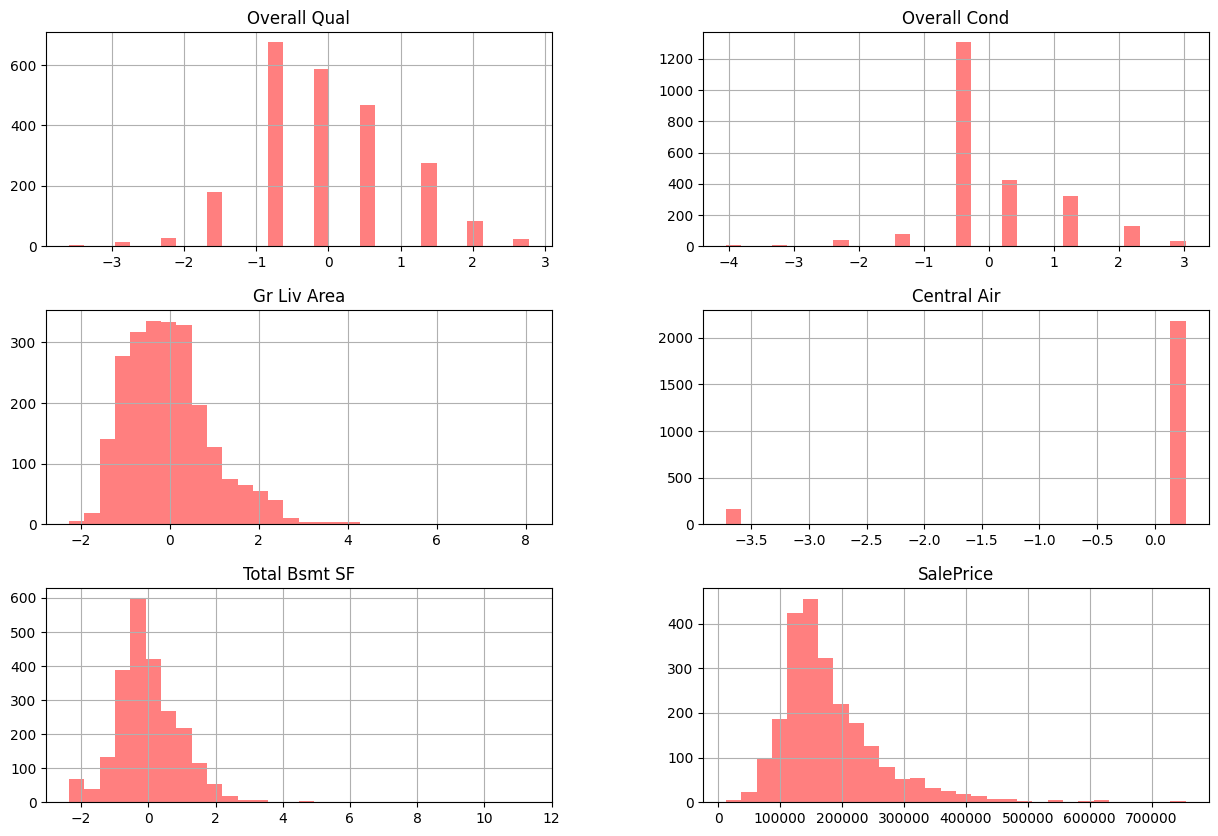

In [ ]:
#Se realiza el histograma de las variables disponibles
transformed_train.hist(bins=30, figsize=(15,10), color="red", alpha=0.5)
plt.show()

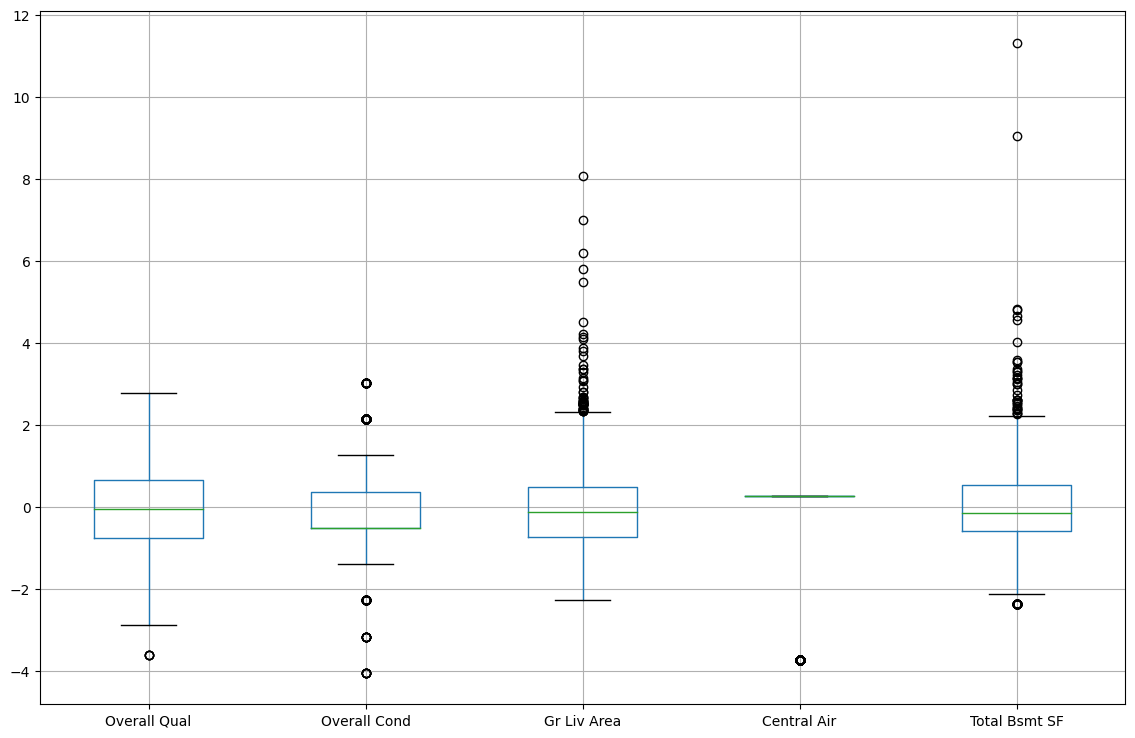

(2343, 6)

In [ ]:
#Se identifican los valores atipicos y se eliminan con el metodo IQR
transformed_train[['Overall Qual','Overall Cond','Gr Liv Area','Central Air','Total Bsmt SF']].boxplot(figsize=(14,9))
plt.show()

Q1 = transformed_train.quantile(0.25)
Q3 = transformed_train.quantile(0.75)
IQR = Q3 - Q1
upper_limit = Q3 + 1.5 * IQR
lower_limit = Q1 - 1.5 * IQR

transformed_train.shape

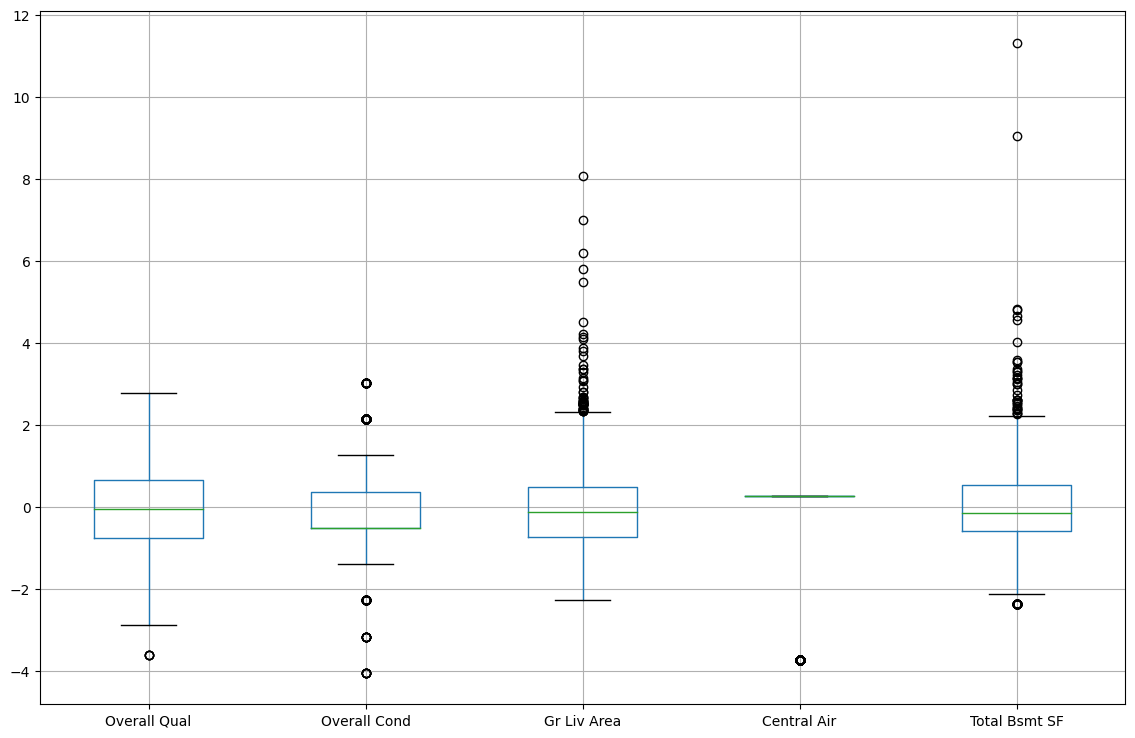

In [ ]:
transformed_train[['Overall Qual','Overall Cond','Gr Liv Area','Central Air','Total Bsmt SF']].boxplot(figsize=(14,9))
plt.show()

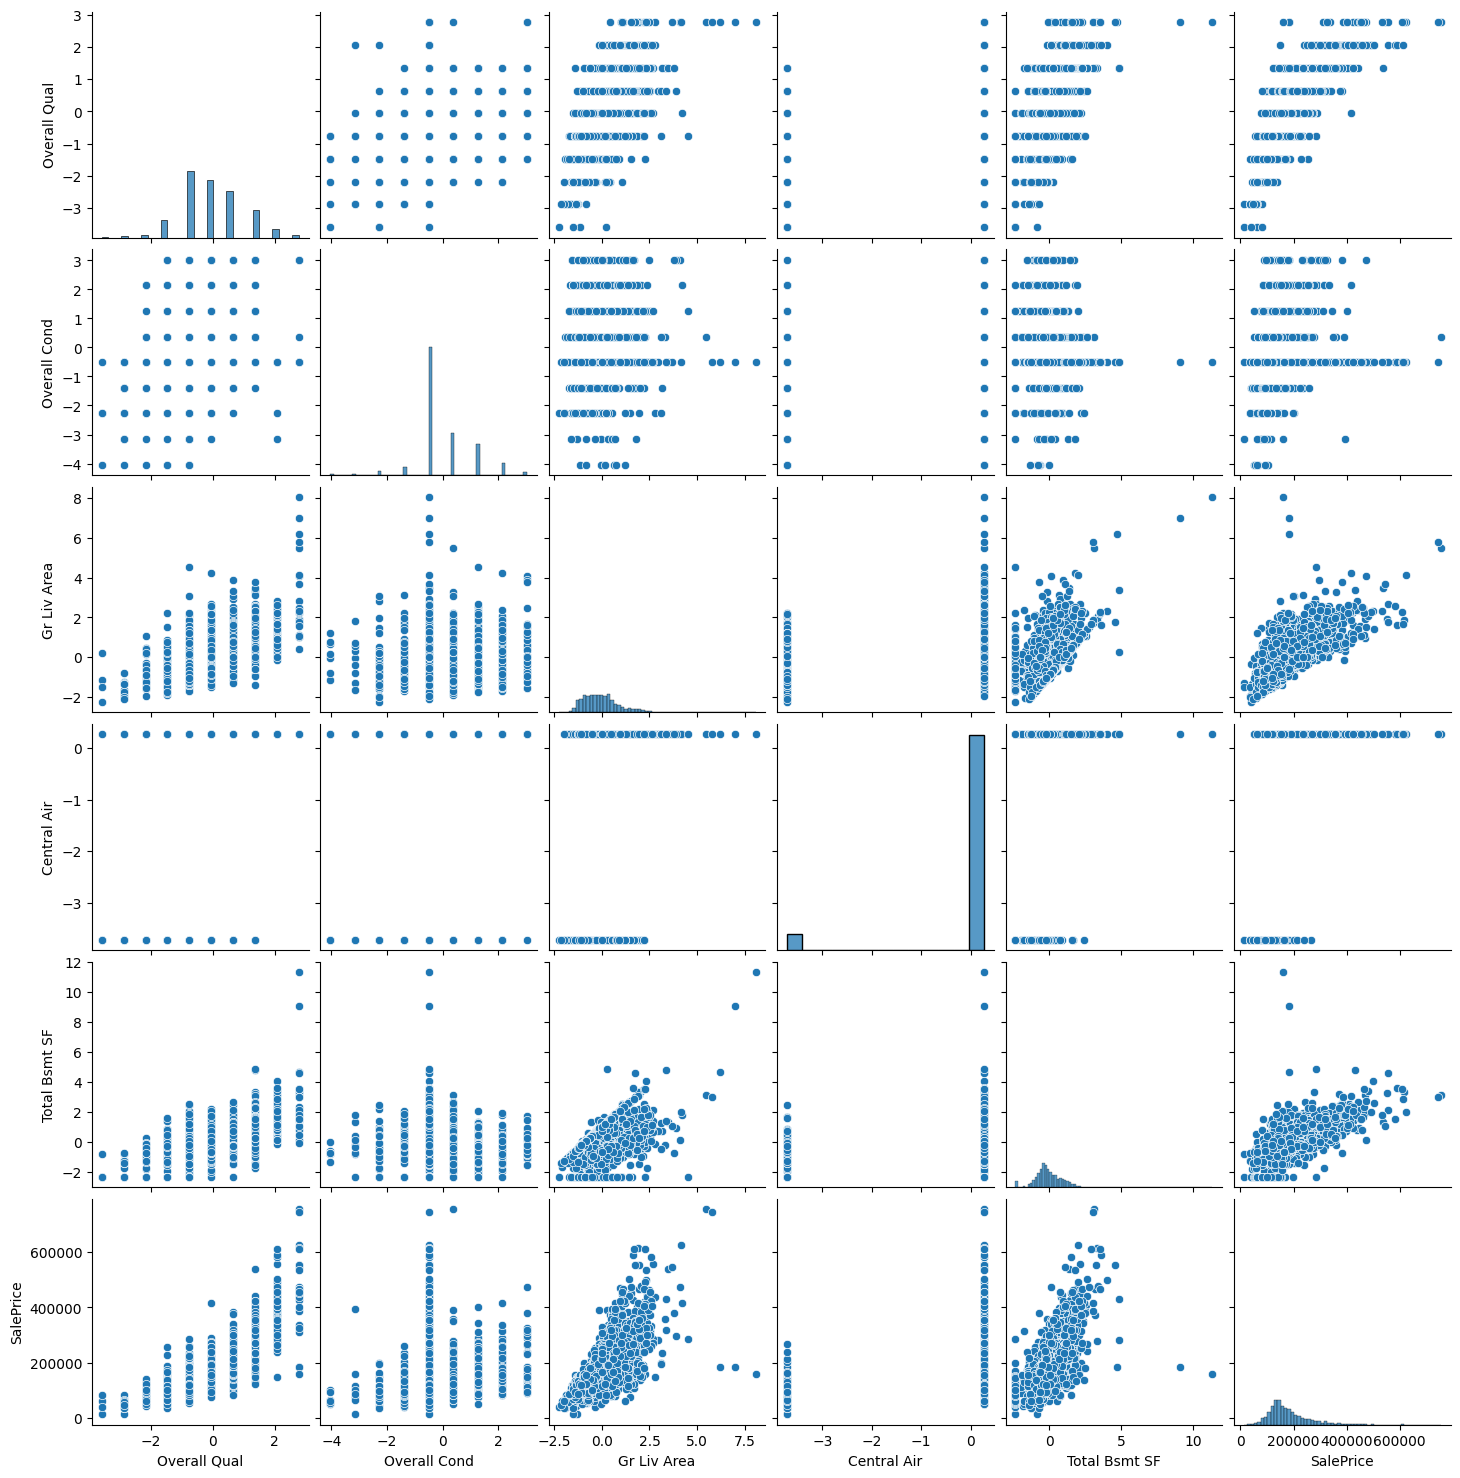

In [ ]:
#Se genera la matriz de dispersiòn
from seaborn.distributions import kdeplot
sns.pairplot(transformed_train)

<Axes: >

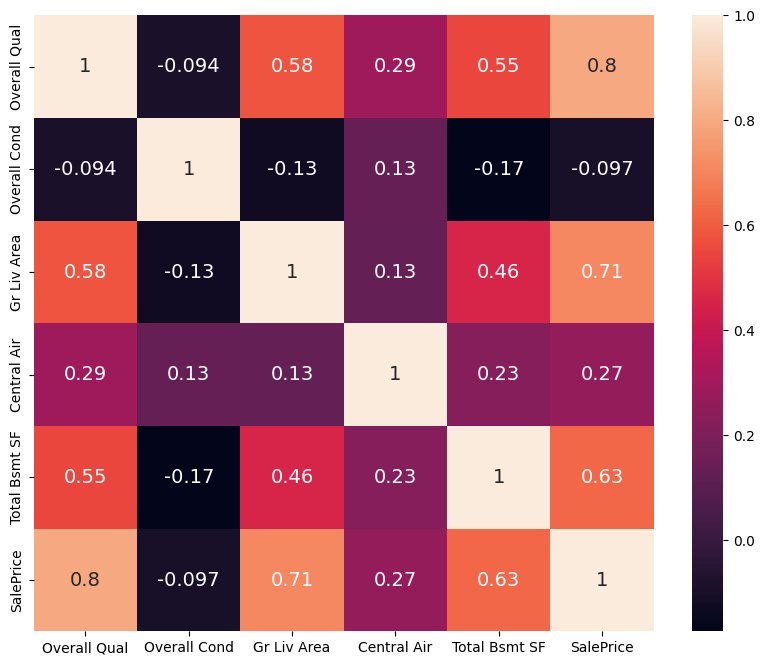

In [ ]:
#Se realiza el mapa de calor de la correlaciòn de las variables
plt.figure(figsize=(10,8))
plt.rc({'size':'18'})
sns.heatmap(transformed_train.corr(), annot = True,annot_kws={"size":14})

**▪ Considerando los valores de correlación determine cuales variables podrían tener una mayor influencia sobre el modelo**

R//Se identifica que las variables que tienen una  correlación fuerte con respecto al Sale Price, son Overall Qual que es el nivel de la calidad de la vivienda y  Gr Liv Area que es el tamaño de la superficie de la casa. Tomando en cuenta que la correlación que presentan es superior a 0.7, indica que su variación influye considerablemente sobre el modelo predictivo del precio de las viviendas.

## **Generaciòn del modelo**

In [ ]:
#Se construye el modelo con cada una de las variables disponibles, teniendo en cuenta el estimador
from sklearn.linear_model import SGDRegressor

model_result = {}
X_train, y_train = train.drop('SalePrice', axis='columns'), train['SalePrice']

In [ ]:
for feature in X_train.columns:

  regressorSGD = Pipeline(
      steps=[("numerical_imputer", SimpleImputer(strategy='mean')),
           ("scaler", StandardScaler()),
           ("sgd", SGDRegressor())])

  regressorSGD.fit(X_train[feature].values.reshape(-1,1), y_train)

  model_result[feature] = regressorSGD

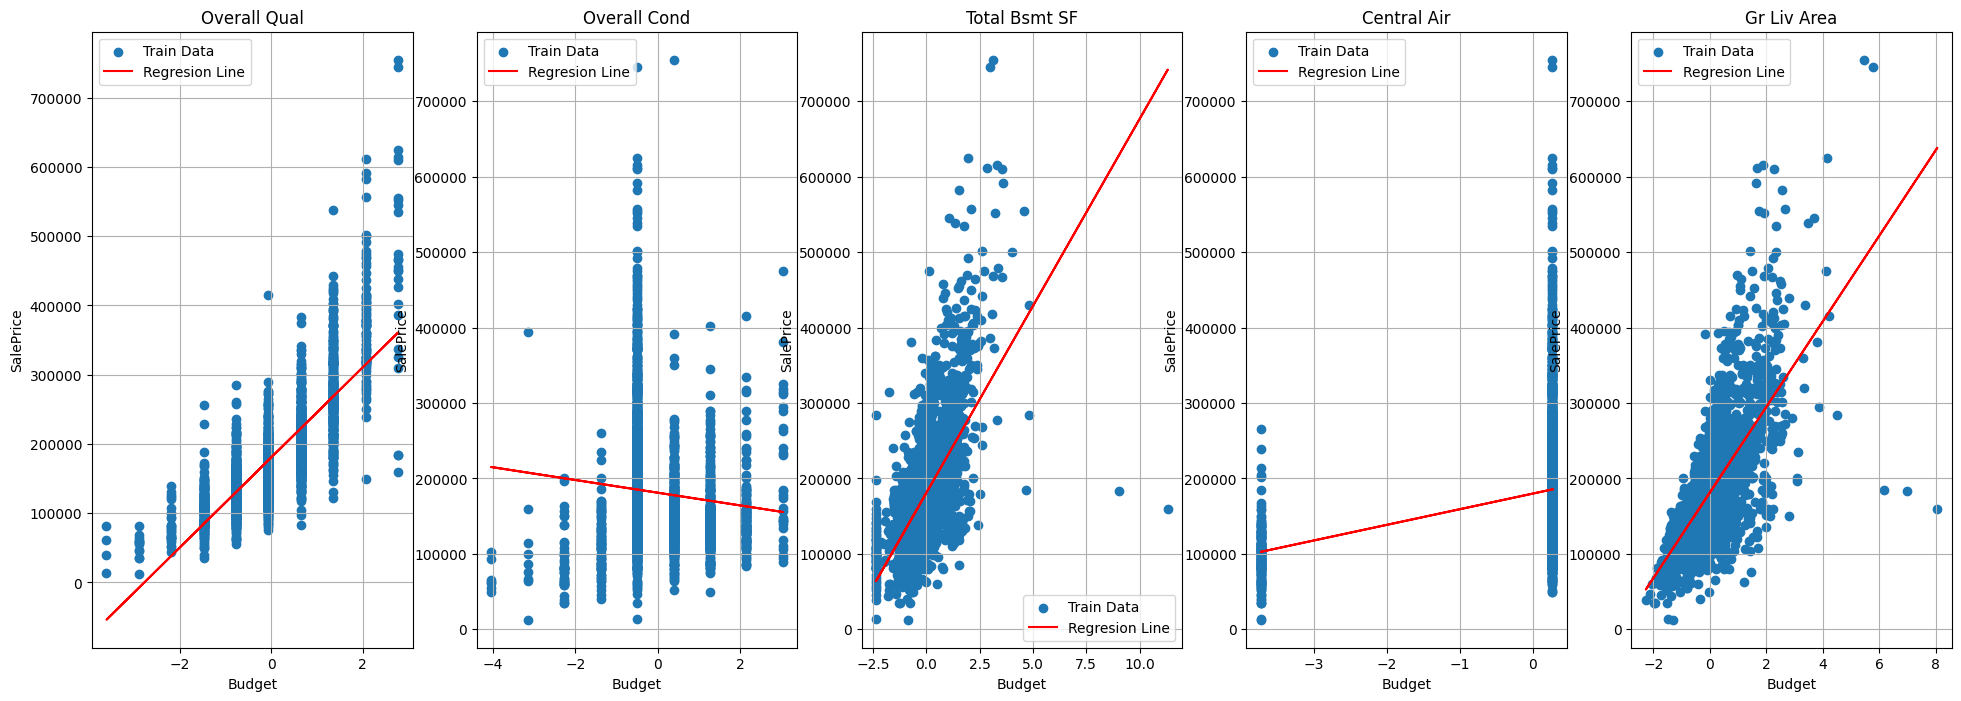

In [ ]:
fig, axes = plt.subplots(1, len(X_train.columns), figsize=(24, 8))

for i ,column in enumerate(X_train.columns):
  X_values = X_train[column].values.reshape(-1, 1)
  y_values = y_train.values.reshape(-1, 1)

  axes[i].scatter(transformed_train[column], y_values, label='Train Data')
  model = model_result[column]
  predicted = model.predict(X_values)
  axes[i].plot(transformed_train[column], predicted, color='red', label='Regresion Line')
  axes[i].set_title(column)
  axes[i].set_xlabel('Budget')
  axes[i].set_ylabel('SalePrice')
  axes[i].grid()
  axes[i].legend()


In [ ]:
#suponga que recibe un nuevo dataset con 100 características ¿es viable probar todas las
#combinaciones? ¿Cuántas modelos se generarían?



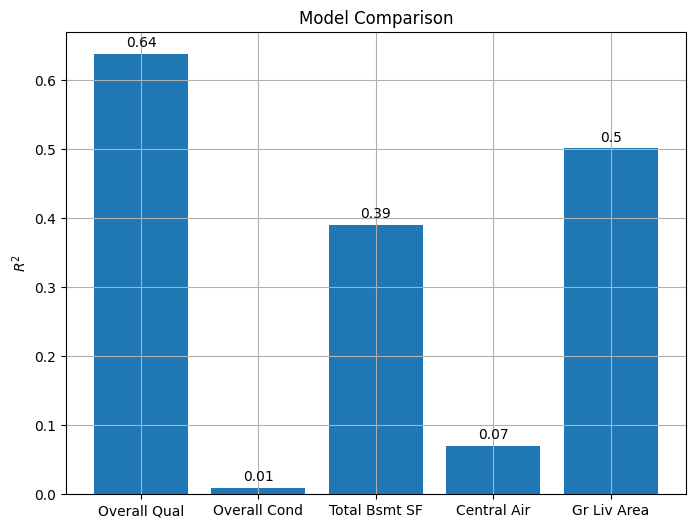

In [ ]:
#Seleccione los 5 modelos con el coeficiente de determinación más alto y compárelos con un
#diagrama de barras

scores = []
for i, feature in enumerate(X_train.columns):
  X_values = X_train.iloc[:,i].values.reshape(-1, 1)
  y_values = y_train.values.reshape(-1, 1)
  model = model_result[feature]
  scores.append(model.score(X_values, y_values))

plt.figure(figsize=(8,6))
plt.bar(X_train.columns, scores)
plt.ylabel('$R^2$')
plt.title('Model Comparison')
plt.grid()

def add_labels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i] + 0.01, round(y[i],2), ha = 'center')

add_labels(X_train.columns, scores)

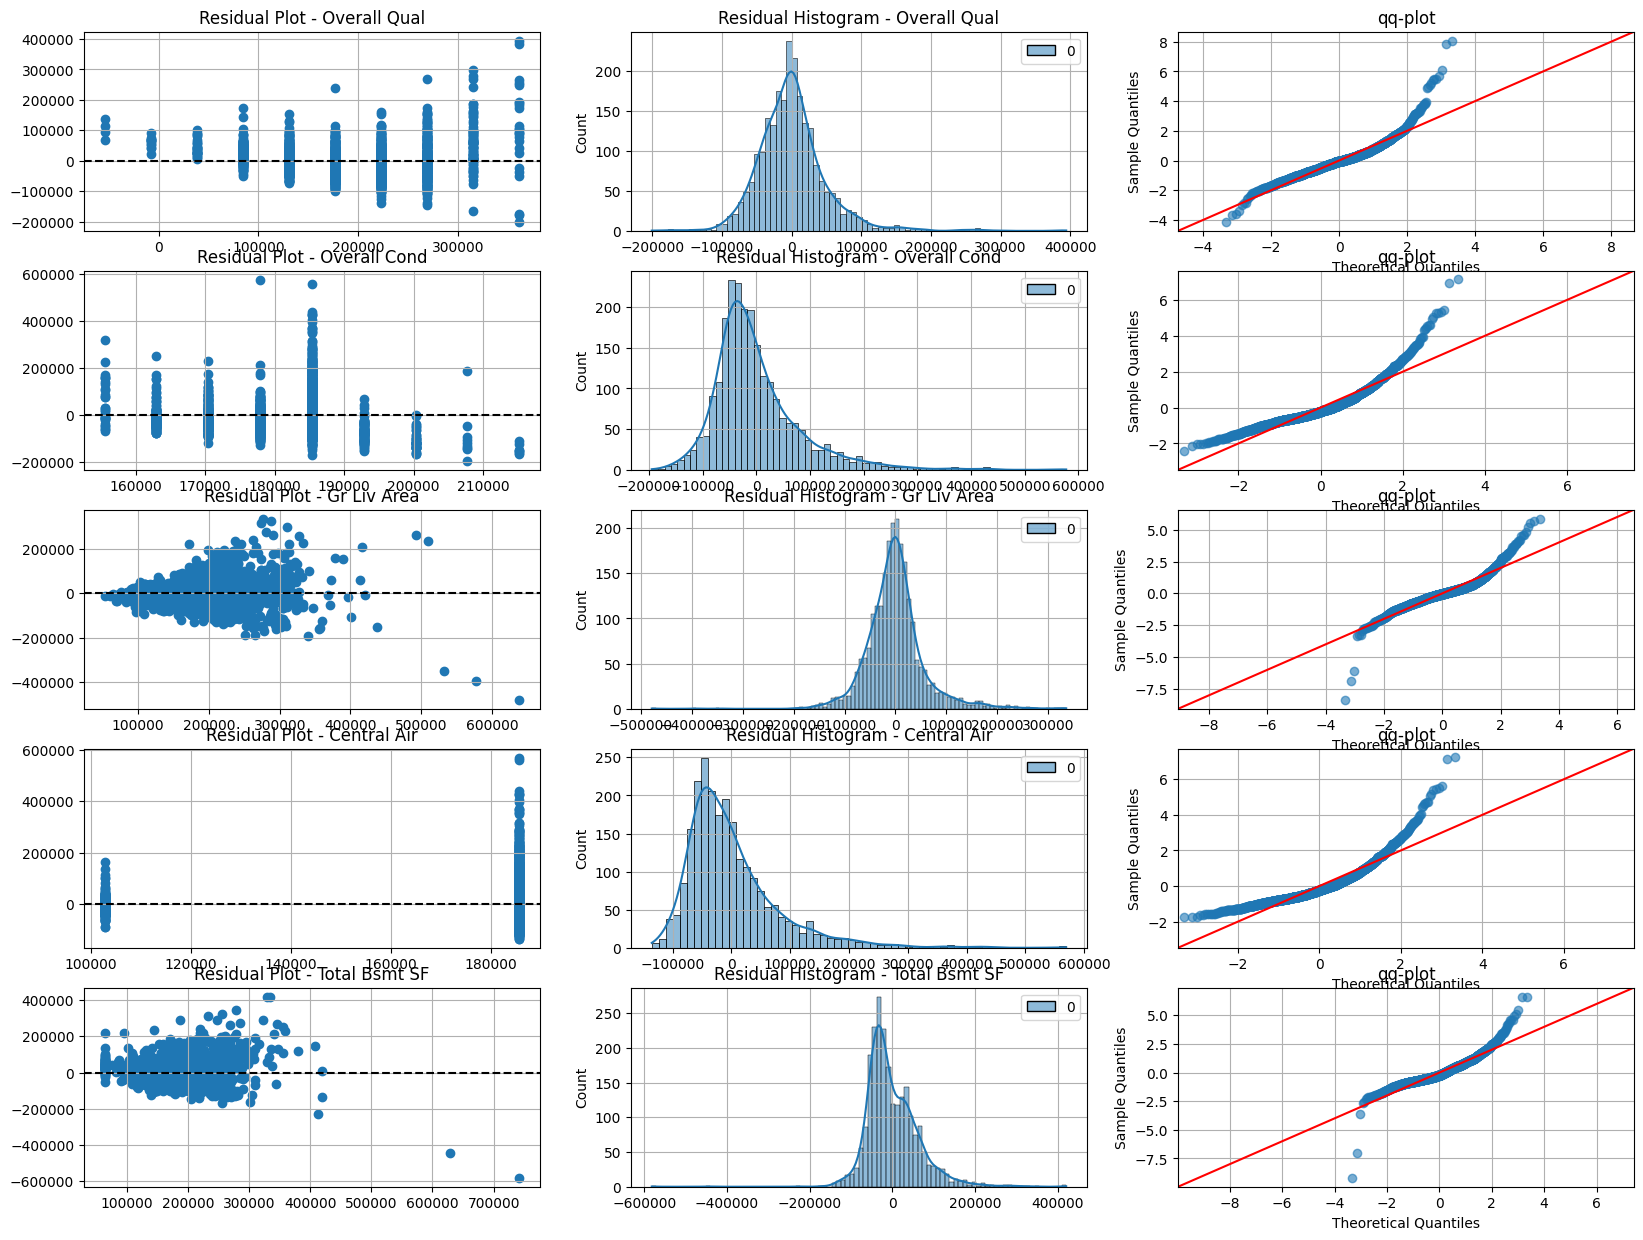

In [ ]:
#Se genera las graficas de residuos
from statsmodels.api import qqplot

selected = ['Overall Qual','Overall Cond','Gr Liv Area','Central Air','Total Bsmt SF']
residuals_train = {}
fig, axes = plt.subplots(5, 3, figsize=(20, 15))

for i, feature in enumerate(selected):

  X_values = X_train[feature].values.reshape(-1,1)
  y_values = y_train.values.reshape(-1, 1)
  model = model_result[feature]
  y_pred = model.predict(X_values)
  residual =  y_values - y_pred.reshape(-1,1)
  residuals_train[feature] = residual
  axes[i][0].axhline(y=0, color='black', linestyle='--')
  axes[i][0].scatter(y_pred, residual)
  axes[i][0].set_title('Residual Plot - ' +  feature)
  sns.histplot(residual, kde=True, ax=axes[i][1])
  axes[i][1].set_title('Residual Histogram - ' +  feature)
  qqplot(np.sort(residual.flatten()), fit=True, line="45", ax=axes[i][2], alpha= 0.6)
  axes[i][2].set_title('qq-plot')
  axes[i][0].grid()
  axes[i][1].grid()
  axes[i][2].grid()

## **Evaluaciòn de desempeño**

In [ ]:
from itertools import combinations

all_combinatios = []
model_final = {}
features = ['Overall Qual', 'Overall Cond', 'Gr Liv Area','Central Air','Total Bsmt SF']
final_scores = []
for i in range(1, 7):
  all_combinatios += list(combinations(features, i))

all_combinatios = [list(combination) for combination in all_combinatios]
all_combinatios

[['Overall Qual'],
 ['Overall Cond'],
 ['Gr Liv Area'],
 ['Central Air'],
 ['Total Bsmt SF'],
 ['Overall Qual', 'Overall Cond'],
 ['Overall Qual', 'Gr Liv Area'],
 ['Overall Qual', 'Central Air'],
 ['Overall Qual', 'Total Bsmt SF'],
 ['Overall Cond', 'Gr Liv Area'],
 ['Overall Cond', 'Central Air'],
 ['Overall Cond', 'Total Bsmt SF'],
 ['Gr Liv Area', 'Central Air'],
 ['Gr Liv Area', 'Total Bsmt SF'],
 ['Central Air', 'Total Bsmt SF'],
 ['Overall Qual', 'Overall Cond', 'Gr Liv Area'],
 ['Overall Qual', 'Overall Cond', 'Central Air'],
 ['Overall Qual', 'Overall Cond', 'Total Bsmt SF'],
 ['Overall Qual', 'Gr Liv Area', 'Central Air'],
 ['Overall Qual', 'Gr Liv Area', 'Total Bsmt SF'],
 ['Overall Qual', 'Central Air', 'Total Bsmt SF'],
 ['Overall Cond', 'Gr Liv Area', 'Central Air'],
 ['Overall Cond', 'Gr Liv Area', 'Total Bsmt SF'],
 ['Overall Cond', 'Central Air', 'Total Bsmt SF'],
 ['Gr Liv Area', 'Central Air', 'Total Bsmt SF'],
 ['Overall Qual', 'Overall Cond', 'Gr Liv Area', 'Centra

In [ ]:
for combination in all_combinatios:
   sgd = SGDRegressor()
   X_values = X_train[combination].values.reshape(-1, len(combination))
   y_values = y_train.ravel()

   regressorSGD = Pipeline(
      steps=[("numerical_imputer", SimpleImputer(strategy='mean')),
           ("scaler", StandardScaler()),
           ("sgd", SGDRegressor())])

   regressorSGD.fit(X_values, y_values)
   y_pred = regressorSGD.predict(X_values)
   model_final[combination.__repr__()] = regressorSGD
   final_scores.append(regressorSGD.score(X_values, y_values))

In [ ]:
test_scores = []

X_test, y_test = test.drop('SalePrice', axis='columns'), test['SalePrice']
X_test['Central Air'] = X_test['Central Air'].map(lambda x:(x.replace('Y','1.0')))
X_test['Central Air'] = X_test['Central Air'].map(lambda x:(x.replace('N','0.0')))
X_test['Central Air']=X_test['Central Air'].astype(float)
for combination in all_combinatios:

  X_values = X_test[combination].values.reshape(-1,len(combination))
  y_values = y_test.values.reshape(-1, 1)

  model = model_final[combination.__repr__()]
  test_scores.append(model.score(X_values, y_values))

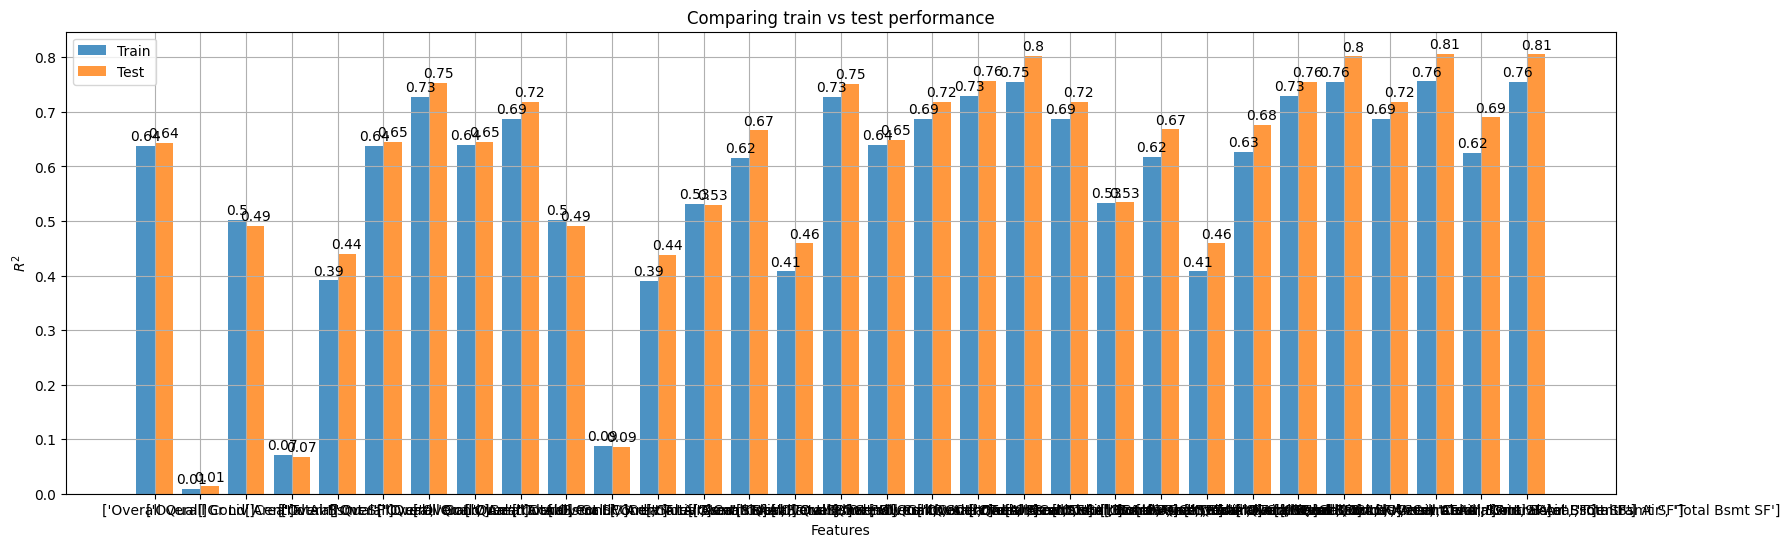

In [ ]:
plt.figure(figsize=(20,6))

X_axis = np.arange(len(model_final.keys()))

plt.bar(X_axis - 0.2, final_scores, 0.4, label = 'Train', alpha=0.8)
plt.bar(X_axis + 0.2,test_scores, 0.4, label = 'Test', alpha=0.8)

plt.ylabel('$R^2$')
plt.title('Test Comparison')
plt.grid()
plt.xticks(X_axis, model_final.keys())
plt.xlabel("Features")
plt.title("Comparing train vs test performance")
plt.legend()

def addlabels(x, y, val):
    for i in range(len(x)):
        plt.text(i + val , y[i] + 0.01, round(y[i],2), ha = 'center')

addlabels(model_final.keys(), final_scores, - 0.2)
addlabels(model_final.keys(), test_scores, + 0.2)

plt.show()

/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/gofplots.py:1045: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)
/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/gofplots.py:1045: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)
/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/gofplots.py:1045: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)
/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/gofplots.py:1045: UserWarning: color is redundantly defined by the 'color' keyword a

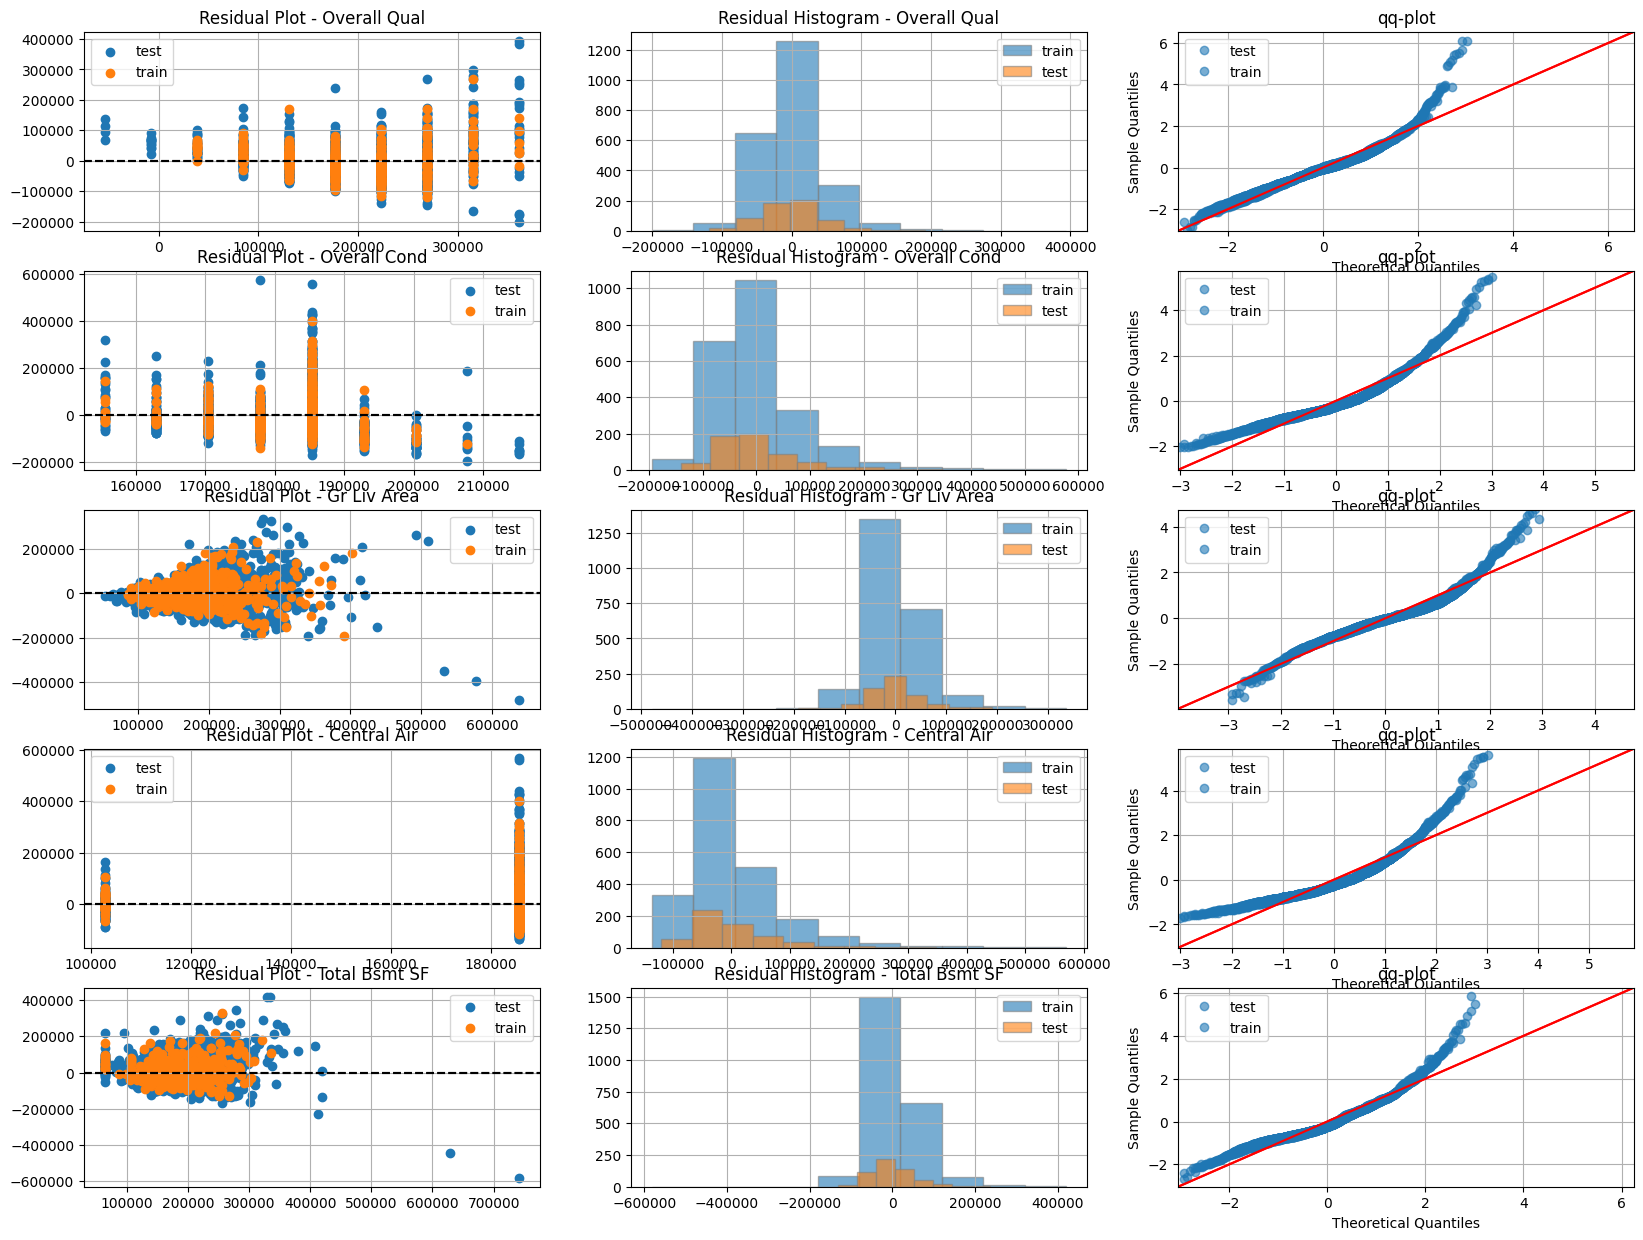

In [ ]:
selected = ['Overall Qual', 'Overall Cond', 'Gr Liv Area','Central Air','Total Bsmt SF']
fig, axes = plt.subplots(5, 3, figsize=(20, 15))

for i, combination in enumerate(selected):

  X_train_values = X_train[combination].values.reshape(-1,1)
  residual_ = residuals_train[combination]

  X_test_values = X_test[combination].values.reshape(-1,1)
  y_values = y_test.values.reshape(-1, 1)
  model = model_result[combination]
  y_pred = model.predict(X_test_values)
  y_pred_ = model.predict(X_train_values)
  residual = y_values - y_pred.reshape(-1,1)
  axes[i][0].axhline(y=0, color='black', linestyle='--')
  axes[i][0].scatter(y_pred_, residual_, label='test')
  axes[i][0].set_title('Residual Plot - ' +  feature)

  axes[i][0].axhline(y=0, color='black', linestyle='--')
  axes[i][0].scatter(y_pred, residual, label='train')
  axes[i][0].set_title('Residual Plot - ' +  combination)
  axes[i][0].legend()
  axes[i][0].grid()

  axes[i][1].hist(residual_, alpha= 0.6, ec="grey", label='train')
  axes[i][1].hist(residual, alpha= 0.6, ec="grey", label='test')
  axes[i][1].set_title('Residual Histogram - ' +  combination)
  axes[i][1].legend()
  axes[i][1].grid()

  qqplot(np.sort(residual.flatten()), fit=True, line="45", ax=axes[i][2], alpha= 0.6, label='test')
  axes[i][2].set_title('qq-plot')
  qqplot(np.sort(residual_.flatten()), fit=True, line="45", ax=axes[i][2], alpha= 0.6, color='orange', label='train')
  axes[i][2].set_title('qq-plot')
  axes[i][2].grid()
  axes[i][2].legend()